###  Predict delivery time using sorting time 

### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import dataset
delivery_data=pd.read_csv(r"C:\Users\PRIYANKA\Data_Science_14_april_jhon\data_Sets\delivery_time.csv")


In [3]:
delivery_data.rename({'Delivery Time':'Delivery_Time','Sorting Time':"Sorting_Time"},axis=1,inplace=True)
delivery_data

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
# performing initial analysis
delivery_data.shape

(21, 2)

In [5]:
delivery_data.isna().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [6]:
delivery_data.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [7]:
delivery_data.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
# ASSUMPTION CHECKs

In [10]:
#1. LINEARITY CHECK

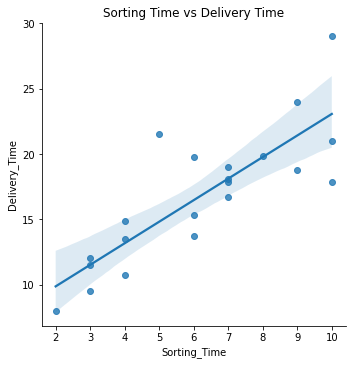

In [11]:
sns.lmplot(x='Sorting_Time',y='Delivery_Time',data=delivery_data)
plt.title("Sorting Time vs Delivery Time")
plt.show()

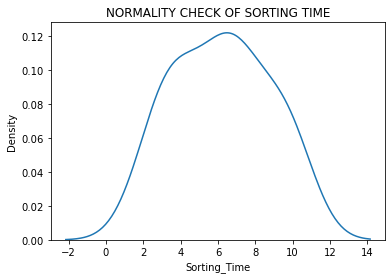

In [12]:
# 2. NORMALITY CHECK

sns.distplot(a=delivery_data['Sorting_Time'],hist=False)
plt.title("NORMALITY CHECK OF SORTING TIME")
plt.show()

In [13]:
delivery_data['Sorting_Time'].skew()

0.047115474210530174

In [14]:
delivery_data['Sorting_Time'].kurt()

-1.14845514534878

In [15]:
# model building and training

linear_model = smf.ols(formula ='Delivery_Time~Sorting_Time',data=delivery_data).fit()

In [16]:
linear_model

In [17]:
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
X = delivery_data[['Sorting_Time']]
y = delivery_data[['Delivery_Time']]

In [19]:
# 5. Homoscadasticity check

from sklearn.linear_model import LinearRegression
Linear_model = LinearRegression() # INITILIZATION OF MODEL
Linear_model.fit(X,y)

LinearRegression()

In [20]:
y_pred =Linear_model.predict(X)
y_pred

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

In [21]:
error=y-y_pred
error

,Delivery_Time
0,-2.072933
1,0.321186
2,3.273147
3,2.576087
4,5.927067
5,-1.126853
6,0.874127
7,-2.029794
8,-5.172933
9,-2.673913


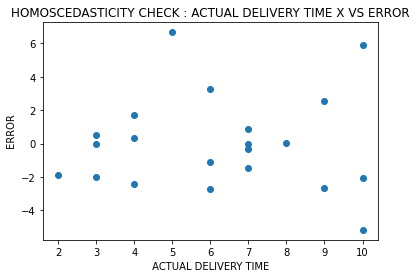

In [22]:
plt.scatter(x=delivery_data['Sorting_Time'],y=error)
plt.title("HOMOSCEDASTICITY CHECK : ACTUAL DELIVERY TIME X VS ERROR")
plt.xlabel(" ACTUAL DELIVERY TIME ")
plt.ylabel(" ERROR ")
plt.show()

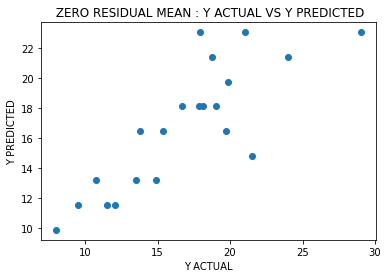

In [23]:
# 6.Zero residual mean check
plt.scatter(x=delivery_data['Delivery_Time'],y=y_pred)
plt.title(" ZERO RESIDUAL MEAN : Y ACTUAL VS Y PREDICTED")
plt.xlabel("Y ACTUAL")
plt.ylabel("Y PREDICTED")
plt.show()

In [24]:
error.mean()

Delivery_Time   -2.706829e-15
dtype: float64

In [25]:
#model testing (predicting the output)
data=[3,5,7]
test_data= pd.DataFrame(data, columns = ['Sorting_Time'])
test_data

,Sorting_Time
0,3
1,5
2,7


In [26]:
linear_model.predict(test_data)

0    11.529794
1    14.827833
2    18.125873
dtype: float64